In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
import seaborn as sn
import plotly.express as px

### Upload aggregated overall suicide rates during 2011 to 2015

In [3]:
suicide_overall = pd.read_csv(r'Overall_Suicide_Aggregated/overall_2015_aggregated.txt', sep='\t',dtype={"County Code": str})
suicide_overall = suicide_overall.drop("Notes",1)
suicide_overall = suicide_overall.dropna(how = 'any')
suicide_overall['Deaths']=suicide_overall['Deaths'].astype(int)
suicide_overall['Population']=suicide_overall['Population'].astype(int)
suicide_overall['SuicideDeathRate'] = (suicide_overall['Deaths'] / suicide_overall['Population'])*100000
suicide_overall.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,County,County Code,Deaths,Population,Crude Rate,SuicideDeathRate
0,"Autauga County, AL",01001,51,276769,18.4,18.426919
1,"Baldwin County, AL",01003,199,976867,20.4,20.371248
2,"Barbour County, AL",01005,17,134772,Unreliable,12.613896
3,"Bibb County, AL",01007,17,112964,Unreliable,15.049042
4,"Blount County, AL",01009,50,288767,17.3,17.314998


### Upload aggregated firearm suicide rates during 2011 to 2015

In [4]:
suicide_firearm = pd.read_csv(r'Firearm_Suicide_Aggregated/firearm_2015_aggregated.txt', sep='\t',dtype={"County Code": str})
suicide_firearm = suicide_firearm.drop("Notes",1)
suicide_firearm = suicide_firearm.dropna(how = 'any')
suicide_firearm['Deaths']=suicide_firearm['Deaths'].astype(int)
suicide_firearm['Population']=suicide_firearm['Population'].astype(int)
suicide_firearm['SuicideDeathRate'] = (suicide_firearm['Deaths'] / suicide_firearm['Population'])*100000
suicide_firearm.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,County,County Code,Deaths,Population,Crude Rate,SuicideDeathRate
0,"Autauga County, AL",01001,35,276769,12.6,12.645925
1,"Baldwin County, AL",01003,132,976867,13.5,13.512587
2,"Barbour County, AL",01005,11,134772,Unreliable,8.161933
3,"Bibb County, AL",01007,13,112964,Unreliable,11.508091
4,"Blount County, AL",01009,34,288767,11.8,11.774199


### Upload aggregated non-firearm suicide rates during 2011 to 2015

In [5]:
suicide_nonfirearm = pd.read_csv(r'Nonfirearm_Suicide_Aggregated/nonfirearm_2015_aggregated.txt', sep='\t',dtype={"County Code": str})
suicide_nonfirearm = suicide_nonfirearm.drop("Notes",1)
suicide_nonfirearm = suicide_nonfirearm.dropna(how = 'any')
suicide_nonfirearm['Deaths']=suicide_nonfirearm['Deaths'].astype(int)
suicide_nonfirearm['Population']=suicide_nonfirearm['Population'].astype(int)
suicide_nonfirearm['SuicideDeathRate'] = (suicide_nonfirearm['Deaths'] / suicide_nonfirearm['Population'])*100000
suicide_nonfirearm.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,County,County Code,Deaths,Population,Crude Rate,SuicideDeathRate
0,"Autauga County, AL",01001,16,276769,Unreliable,5.780994
1,"Baldwin County, AL",01003,67,976867,6.9,6.858661
2,"Blount County, AL",01009,16,288767,Unreliable,5.540799
3,"Calhoun County, AL",01015,24,583365,4.1,4.114062
4,"Cherokee County, AL",01019,14,130177,Unreliable,10.754588


In [6]:
amount = [suicide_overall.shape[0], suicide_firearm.shape[0], suicide_nonfirearm.shape[0]]
data = {'Suicide Type': ['overall', 'firearm', 'nonfirearm'],
       'County Amount': amount}
df_amount = pd.DataFrame(data)
df_amount

,Suicide Type,County Amount
0,overall,2318
1,firearm,1918
2,nonfirearm,1404


### make up the missing non-firearm death records as many as possible

In [7]:
FS = suicide_firearm[['County Code', 'Deaths']]
FS = FS.rename(columns = {'County Code': 'fips', 'Deaths': 'Deaths_FS'})
NFS = suicide_nonfirearm[['County Code', 'Deaths']]
NFS = NFS.rename(columns = {'County Code': 'fips', 'Deaths': 'Deaths_NFS'})
suicide = suicide_overall[['County', 'County Code', 'Deaths', 'Population']]
suicide = suicide.rename(columns = {'County Code': 'fips'})

In [8]:
FS.head()

,fips,Deaths_FS
0,01001,35
1,01003,132
2,01005,11
3,01007,13
4,01009,34


In [9]:
NFS.head()

,fips,Deaths_NFS
0,01001,16
1,01003,67
2,01009,16
3,01015,24
4,01019,14


In [10]:
suicide.head()

,County,fips,Deaths,Population
0,"Autauga County, AL",01001,51,276769
1,"Baldwin County, AL",01003,199,976867
2,"Barbour County, AL",01005,17,134772
3,"Bibb County, AL",01007,17,112964
4,"Blount County, AL",01009,50,288767


In [11]:
suicide = suicide.merge(FS, on = 'fips', how = 'left')
suicide = suicide.merge(NFS, on = 'fips', how = 'left')
suicide.head()

,County,fips,Deaths,Population,Deaths_FS,Deaths_NFS
0,"Autauga County, AL",01001,51,276769,35.0,16.0
1,"Baldwin County, AL",01003,199,976867,132.0,67.0
2,"Barbour County, AL",01005,17,134772,11.0,NaN
3,"Bibb County, AL",01007,17,112964,13.0,NaN
4,"Blount County, AL",01009,50,288767,34.0,16.0


In [12]:
suicide['Deaths_NFS'] = suicide['Deaths'] - suicide['Deaths_FS']
suicide.head()

,County,fips,Deaths,Population,Deaths_FS,Deaths_NFS
0,"Autauga County, AL",01001,51,276769,35.0,16.0
1,"Baldwin County, AL",01003,199,976867,132.0,67.0
2,"Barbour County, AL",01005,17,134772,11.0,6.0
3,"Bibb County, AL",01007,17,112964,13.0,4.0
4,"Blount County, AL",01009,50,288767,34.0,16.0


In [13]:
suicide['Deaths_FS'] = suicide['Deaths'] - suicide['Deaths_NFS']
suicide.head()

,County,fips,Deaths,Population,Deaths_FS,Deaths_NFS
0,"Autauga County, AL",01001,51,276769,35.0,16.0
1,"Baldwin County, AL",01003,199,976867,132.0,67.0
2,"Barbour County, AL",01005,17,134772,11.0,6.0
3,"Bibb County, AL",01007,17,112964,13.0,4.0
4,"Blount County, AL",01009,50,288767,34.0,16.0


In [14]:
suicide_overall = suicide[['County', 'fips', 'Deaths', 'Population']]
suicide_overall['SuicideDeathRate'] = (suicide_overall['Deaths'] / suicide_overall['Population'])*100000
suicide_overall.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,County,fips,Deaths,Population,SuicideDeathRate
0,"Autauga County, AL",01001,51,276769,18.426919
1,"Baldwin County, AL",01003,199,976867,20.371248
2,"Barbour County, AL",01005,17,134772,12.613896
3,"Bibb County, AL",01007,17,112964,15.049042
4,"Blount County, AL",01009,50,288767,17.314998


In [15]:
suicide_firearm = suicide[['County', 'fips', 'Deaths_FS', 'Population']]
suicide_firearm = suicide_firearm.rename(columns = {'Deaths_FS': 'Deaths'})
suicide_firearm['SuicideDeathRate'] = (suicide_firearm['Deaths'] / suicide_firearm['Population'])*100000
suicide_firearm.head()

,County,fips,Deaths,Population,SuicideDeathRate
0,"Autauga County, AL",01001,35.0,276769,12.645925
1,"Baldwin County, AL",01003,132.0,976867,13.512587
2,"Barbour County, AL",01005,11.0,134772,8.161933
3,"Bibb County, AL",01007,13.0,112964,11.508091
4,"Blount County, AL",01009,34.0,288767,11.774199


In [16]:
suicide_nonfirearm = suicide[['County', 'fips', 'Deaths_NFS', 'Population']]
suicide_nonfirearm = suicide_nonfirearm.rename(columns = {'Deaths_NFS': 'Deaths'})
suicide_nonfirearm['SuicideDeathRate'] = (suicide_nonfirearm['Deaths'] / suicide_nonfirearm['Population'])*100000
suicide_nonfirearm.head()

,County,fips,Deaths,Population,SuicideDeathRate
0,"Autauga County, AL",01001,16.0,276769,5.780994
1,"Baldwin County, AL",01003,67.0,976867,6.858661
2,"Barbour County, AL",01005,6.0,134772,4.451963
3,"Bibb County, AL",01007,4.0,112964,3.540951
4,"Blount County, AL",01009,16.0,288767,5.540799


In [17]:
suicide_overall = suicide_overall.dropna()
suicide_firearm = suicide_firearm.dropna()
suicide_nonfirearm = suicide_nonfirearm.dropna()

In [18]:
amount = [suicide_overall.shape[0], suicide_firearm.shape[0], suicide_nonfirearm.shape[0]]
data = {'Suicide Type': ['overall', 'firearm', 'nonfirearm'],
       'County Amount': amount}
df_amount = pd.DataFrame(data)
df_amount

,Suicide Type,County Amount
0,overall,2318
1,firearm,1918
2,nonfirearm,1918


In [19]:
suicide_overall['Suicide Type'] = 'Overall'
suicide_firearm['Suicide Type'] = 'Firearm'
suicide_nonfirearm['Suicide Type'] = 'Nonfirearm'

In [20]:
frames = [suicide_overall, suicide_firearm, suicide_nonfirearm]
suicide = pd.concat(frames)
suicide['year'] = '2015'
suicide.head()

,County,fips,Deaths,Population,SuicideDeathRate,Suicide Type,year
0,"Autauga County, AL",01001,51.0,276769,18.426919,Overall,2015
1,"Baldwin County, AL",01003,199.0,976867,20.371248,Overall,2015
2,"Barbour County, AL",01005,17.0,134772,12.613896,Overall,2015
3,"Bibb County, AL",01007,17.0,112964,15.049042,Overall,2015
4,"Blount County, AL",01009,50.0,288767,17.314998,Overall,2015


In [21]:
suicide.shape

(6154, 7)

In [22]:
suicide.to_csv('suicide_all_types_2015.csv')

## uploading environmental data

In [20]:
ur_files = ddf.read_csv('Climate_Factors/climate_factors_aggregated_2015.csv', dtype = {'fips': str})
climate = ur_files.compute()
climate = climate.loc[:, ~climate.columns.str.contains('^Unnamed')]
climate = climate.drop(['county'], axis = 1)
climate.head()

,fips,mean_temp,dewpoint,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone
0,01001,65.824815,55.834299,9.399993,4.311237,0.156562,0.141867,0.514193,0.003858,0.0,0.161772,70.187599,65.406114,10.98,0.2
1,01003,68.909103,NaN,NaN,5.740831,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,9.02,2.8
2,01005,66.532339,56.063428,9.131991,2.940612,0.129502,0.129580,0.535889,0.023062,0.0,0.213073,69.138896,66.135101,10.48,0.2
3,01007,63.938892,53.848740,8.943098,3.259812,0.168848,0.100768,0.374056,0.008219,0.0,0.143484,69.730449,63.310112,10.72,1.6
4,01009,60.279348,NaN,NaN,4.044187,0.160689,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,11.24,3.2


## uploading social economic data

In [21]:
ur_files = ddf.read_csv('Social_Economic_Factors/Social_Economic_2015.csv', dtype = {'fips': str, 'per_capita_income': float})
social = ur_files.compute()
social = social.loc[:, ~social.columns.str.contains('^Unnamed')]
social = social.drop(['year'], axis = 1)
social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality
0,01001,24974.0,12.879382,13.868774,16.469707,4.461659,19.230769,2.436752,3.485077,13.541950,2.991593,24.217236,32.116741,0.854747,24.009407,20.973905,13.972945,14.800529,11.278318,3.0
1,01003,27317.0,13.411661,10.780943,13.364355,2.984994,22.525936,1.076865,18.327977,18.130288,5.583149,16.896182,24.158805,1.425269,22.369328,19.074830,12.621399,13.941093,13.866268,4.0
2,01005,16824.0,26.727439,27.908337,27.502078,9.336370,35.787539,2.006072,1.498730,16.058963,5.102923,53.757612,42.272485,10.663894,50.174277,23.228873,12.475865,14.046487,12.884301,6.0
3,01007,18431.0,16.795878,20.474758,28.095468,5.293867,31.025161,0.227693,1.638613,14.400106,2.240231,25.499912,27.039354,8.246328,26.885246,22.748186,15.240665,13.851531,11.997876,2.0
4,01009,20532.0,16.720933,22.244214,24.436821,3.699078,26.333343,1.724635,0.905281,16.482412,6.674052,12.146942,29.502272,1.003292,23.549638,19.729683,12.900710,14.288685,12.886848,2.0


## uploading altitude data

In [22]:
ur_files = ddf.read_csv('county_altitude.csv', dtype = {'FIPSCODE': str})
altitude = ur_files.compute()
altitude = altitude.rename(columns = {'FIPSCODE': 'fips', 'elevation': 'altitude'})
altitude = altitude[['fips', 'altitude']]
altitude.head()

,fips,altitude
0,19107,207.03
1,19189,390.25
2,19029,385.95
3,19015,268.98
4,19059,425.89


In [23]:
social = social.merge(altitude, on = 'fips', how = 'left')
social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude
0,01001,24974.0,12.879382,13.868774,16.469707,4.461659,19.230769,2.436752,3.485077,13.541950,...,24.217236,32.116741,0.854747,24.009407,20.973905,13.972945,14.800529,11.278318,3.0,128.66
1,01003,27317.0,13.411661,10.780943,13.364355,2.984994,22.525936,1.076865,18.327977,18.130288,...,16.896182,24.158805,1.425269,22.369328,19.074830,12.621399,13.941093,13.866268,4.0,30.30
2,01005,16824.0,26.727439,27.908337,27.502078,9.336370,35.787539,2.006072,1.498730,16.058963,...,53.757612,42.272485,10.663894,50.174277,23.228873,12.475865,14.046487,12.884301,6.0,122.81
3,01007,18431.0,16.795878,20.474758,28.095468,5.293867,31.025161,0.227693,1.638613,14.400106,...,25.499912,27.039354,8.246328,26.885246,22.748186,15.240665,13.851531,11.997876,2.0,74.90
4,01009,20532.0,16.720933,22.244214,24.436821,3.699078,26.333343,1.724635,0.905281,16.482412,...,12.146942,29.502272,1.003292,23.549638,19.729683,12.900710,14.288685,12.886848,2.0,184.46


In [24]:
climate.shape[0]

3142

In [25]:
social.shape[0]

3220

# Check SHAP value with overall suicide rates in 2298 counties

In [29]:
suicide_social = social.merge(suicide_overall[['fips', 'SuicideDeathRate']], on = 'fips', how = 'left')
suicide_social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude,SuicideDeathRate
0,01001,24974.0,12.879382,13.868774,16.469707,4.461659,19.230769,2.436752,3.485077,13.541950,...,32.116741,0.854747,24.009407,20.973905,13.972945,14.800529,11.278318,3.0,128.66,18.426919
1,01003,27317.0,13.411661,10.780943,13.364355,2.984994,22.525936,1.076865,18.327977,18.130288,...,24.158805,1.425269,22.369328,19.074830,12.621399,13.941093,13.866268,4.0,30.30,20.371248
2,01005,16824.0,26.727439,27.908337,27.502078,9.336370,35.787539,2.006072,1.498730,16.058963,...,42.272485,10.663894,50.174277,23.228873,12.475865,14.046487,12.884301,6.0,122.81,12.613896
3,01007,18431.0,16.795878,20.474758,28.095468,5.293867,31.025161,0.227693,1.638613,14.400106,...,27.039354,8.246328,26.885246,22.748186,15.240665,13.851531,11.997876,2.0,74.90,15.049042
4,01009,20532.0,16.720933,22.244214,24.436821,3.699078,26.333343,1.724635,0.905281,16.482412,...,29.502272,1.003292,23.549638,19.729683,12.900710,14.288685,12.886848,2.0,184.46,17.314998


## SHAP

In [30]:
import xgboost
import shap

In [31]:
suicide_social = suicide_social.dropna()
suicide_social.shape[0]

2298

In [32]:
X = suicide_social.iloc[:, 1:-1]
y = suicide_social.iloc[:, -1].array

In [33]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


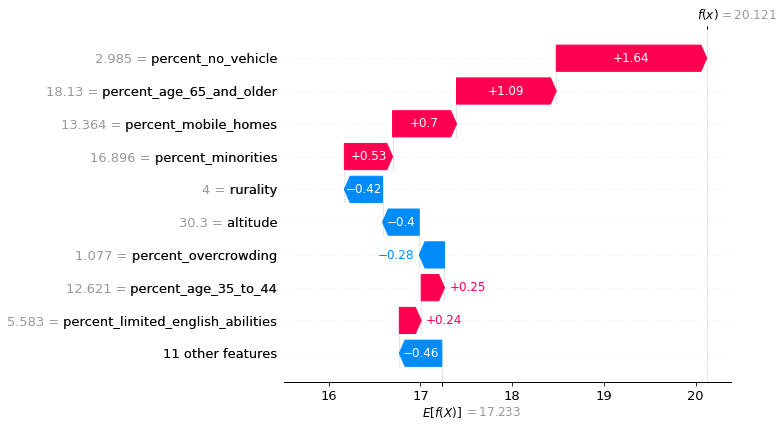

In [34]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

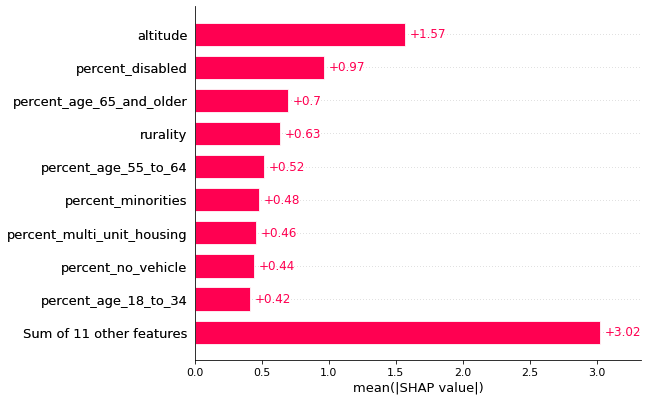

In [35]:
shap.plots.bar(shap_values)

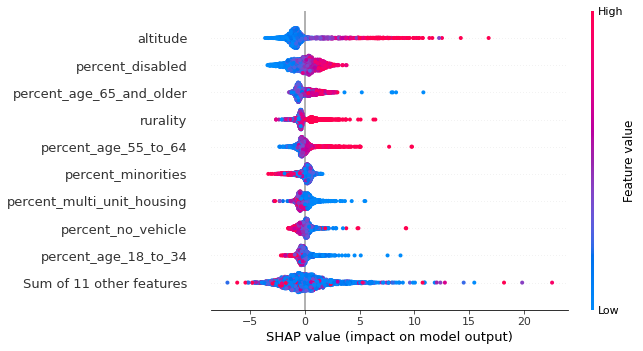

In [36]:
shap.plots.beeswarm(shap_values)

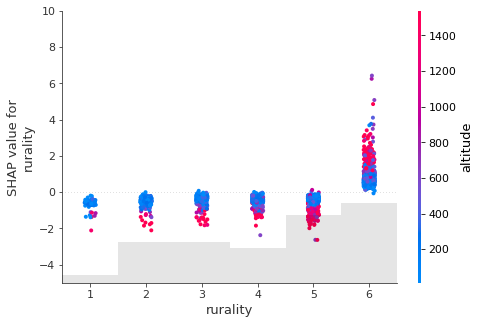

In [37]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values[:,"altitude"], ymin = -5, ymax = 10)

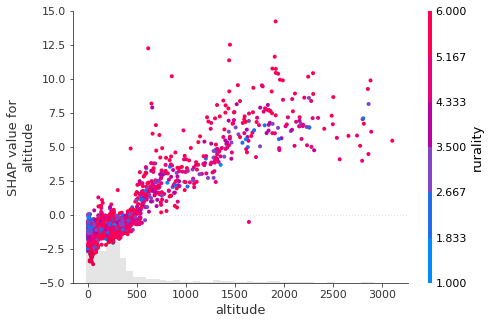

In [38]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15)

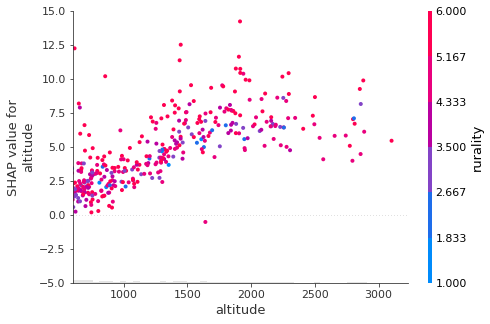

In [39]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15, xmin = 600)

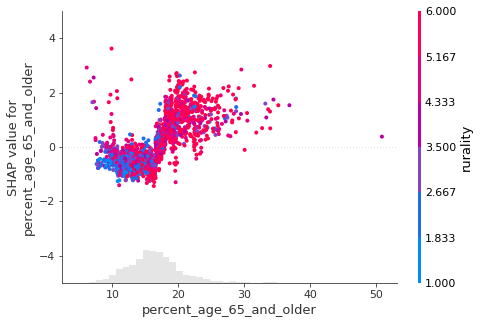

In [40]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

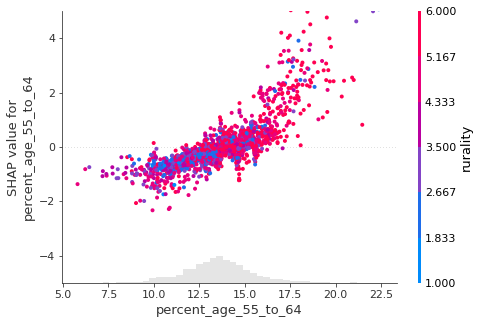

In [41]:
shap.plots.scatter(shap_values[:,"percent_age_55_to_64"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

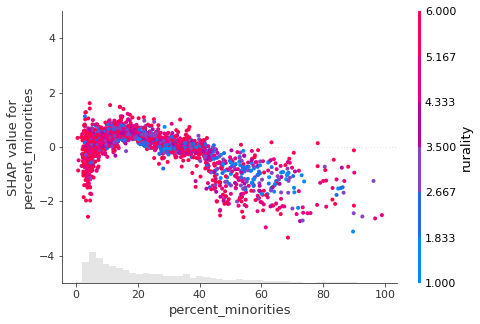

In [42]:
shap.plots.scatter(shap_values[:,"percent_minorities"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

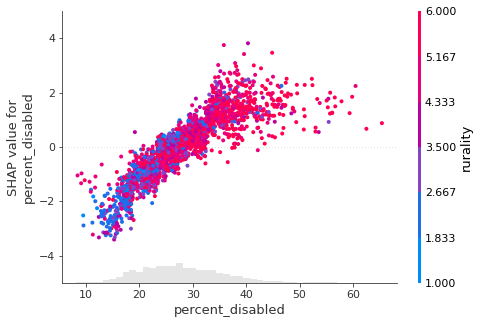

In [43]:
shap.plots.scatter(shap_values[:,"percent_disabled"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

# Check SHAP value with firearm suicide rates in 1901 counties

In [46]:
firearm_social = social.merge(suicide_firearm[['fips', 'SuicideDeathRate']], on = 'fips', how = 'left')
firearm_social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude,SuicideDeathRate
0,01001,24974.0,12.879382,13.868774,16.469707,4.461659,19.230769,2.436752,3.485077,13.541950,...,32.116741,0.854747,24.009407,20.973905,13.972945,14.800529,11.278318,3.0,128.66,12.645925
1,01003,27317.0,13.411661,10.780943,13.364355,2.984994,22.525936,1.076865,18.327977,18.130288,...,24.158805,1.425269,22.369328,19.074830,12.621399,13.941093,13.866268,4.0,30.30,13.512587
2,01005,16824.0,26.727439,27.908337,27.502078,9.336370,35.787539,2.006072,1.498730,16.058963,...,42.272485,10.663894,50.174277,23.228873,12.475865,14.046487,12.884301,6.0,122.81,8.161933
3,01007,18431.0,16.795878,20.474758,28.095468,5.293867,31.025161,0.227693,1.638613,14.400106,...,27.039354,8.246328,26.885246,22.748186,15.240665,13.851531,11.997876,2.0,74.90,11.508091
4,01009,20532.0,16.720933,22.244214,24.436821,3.699078,26.333343,1.724635,0.905281,16.482412,...,29.502272,1.003292,23.549638,19.729683,12.900710,14.288685,12.886848,2.0,184.46,11.774199


In [47]:
firearm_social = firearm_social.dropna()
firearm_social.shape[0]

1901

In [48]:
X = firearm_social.iloc[:, 1:-1]
y = firearm_social.iloc[:, -1].array

In [49]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


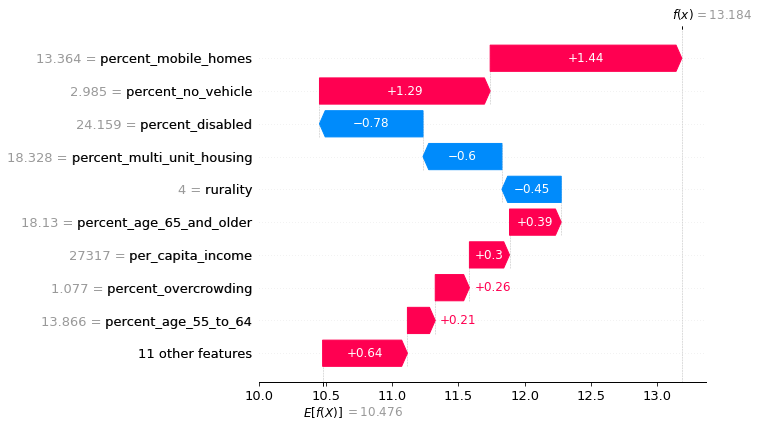

In [50]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

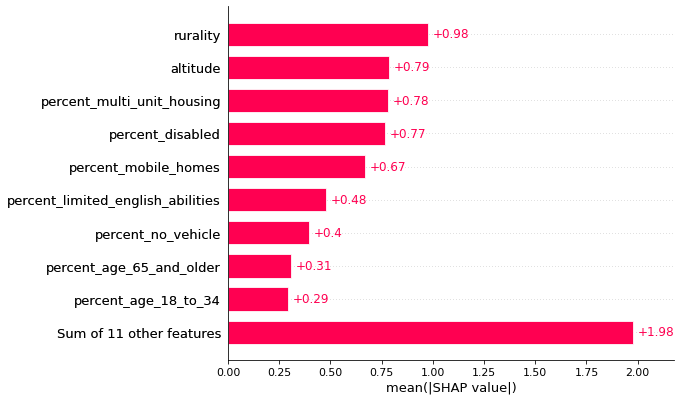

In [51]:
shap.plots.bar(shap_values)

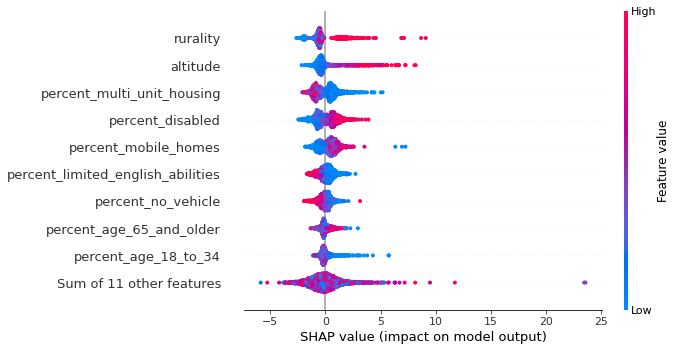

In [52]:
shap.plots.beeswarm(shap_values)

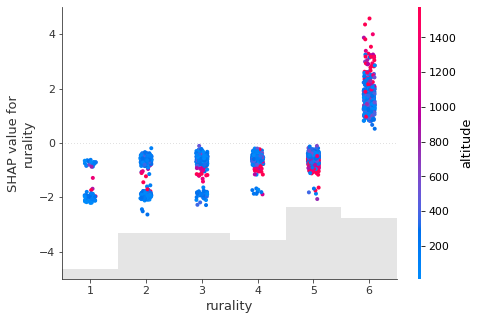

In [53]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values[:,"altitude"], ymin = -5, ymax = 5)

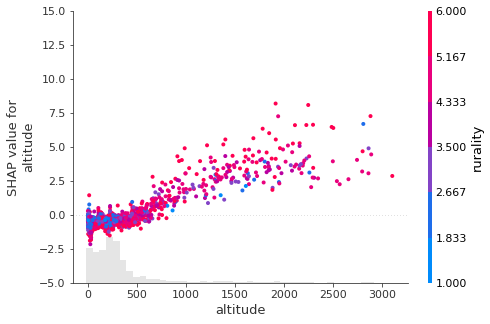

In [54]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15)

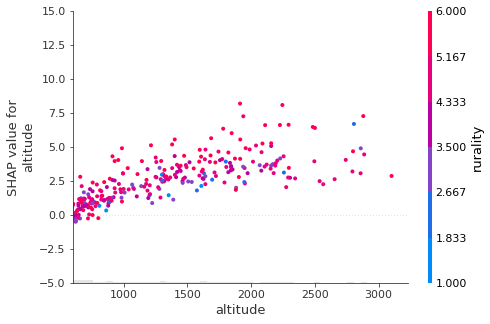

In [55]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15, xmin = 600)

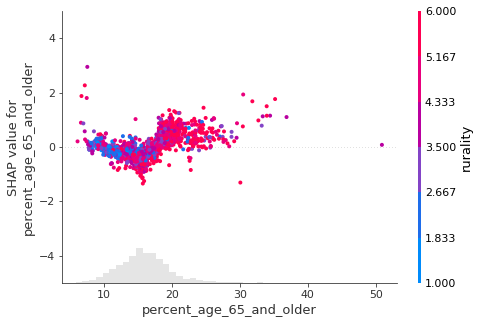

In [56]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

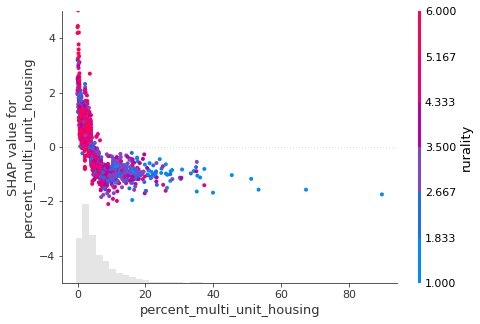

In [57]:
shap.plots.scatter(shap_values[:,"percent_multi_unit_housing"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

# Check SHAP values with nonfirearm suicide rates in 1901 counties

In [58]:
nonfirearm_social = social.merge(suicide_nonfirearm[['fips', 'SuicideDeathRate']], on = 'fips', how = 'left')
nonfirearm_social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude,SuicideDeathRate
0,01001,24974.0,12.879382,13.868774,16.469707,4.461659,19.230769,2.436752,3.485077,13.541950,...,32.116741,0.854747,24.009407,20.973905,13.972945,14.800529,11.278318,3.0,128.66,5.780994
1,01003,27317.0,13.411661,10.780943,13.364355,2.984994,22.525936,1.076865,18.327977,18.130288,...,24.158805,1.425269,22.369328,19.074830,12.621399,13.941093,13.866268,4.0,30.30,6.858661
2,01005,16824.0,26.727439,27.908337,27.502078,9.336370,35.787539,2.006072,1.498730,16.058963,...,42.272485,10.663894,50.174277,23.228873,12.475865,14.046487,12.884301,6.0,122.81,4.451963
3,01007,18431.0,16.795878,20.474758,28.095468,5.293867,31.025161,0.227693,1.638613,14.400106,...,27.039354,8.246328,26.885246,22.748186,15.240665,13.851531,11.997876,2.0,74.90,3.540951
4,01009,20532.0,16.720933,22.244214,24.436821,3.699078,26.333343,1.724635,0.905281,16.482412,...,29.502272,1.003292,23.549638,19.729683,12.900710,14.288685,12.886848,2.0,184.46,5.540799


In [60]:
nonfirearm_social = nonfirearm_social.dropna()
nonfirearm_social.shape[0]

1901

In [61]:
X = nonfirearm_social.iloc[:, 1:-1]
y = nonfirearm_social.iloc[:, -1].array

In [62]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


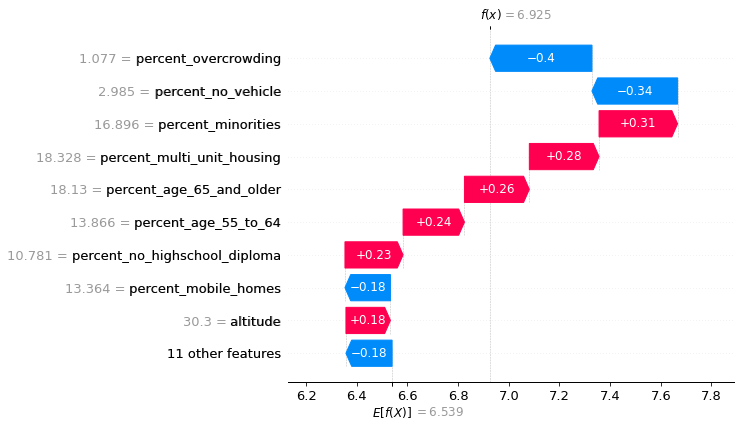

In [63]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

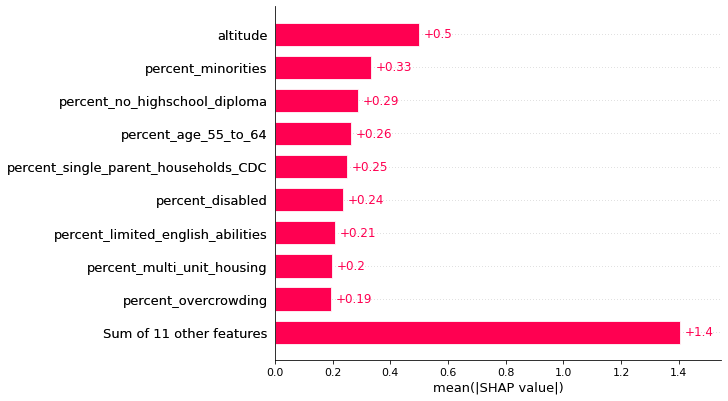

In [64]:
shap.plots.bar(shap_values)

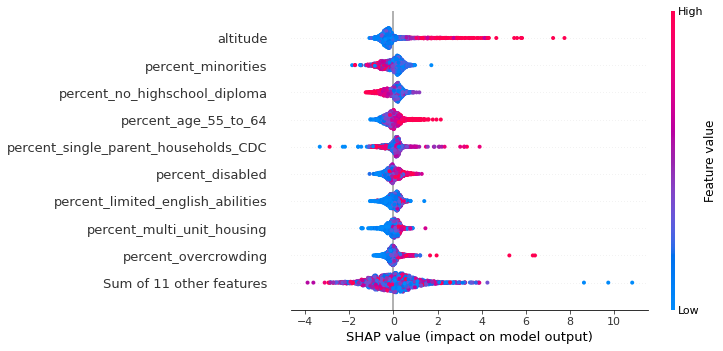

In [65]:
shap.plots.beeswarm(shap_values)

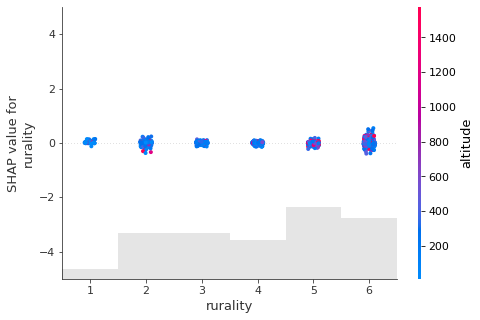

In [66]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values[:,"altitude"], ymin = -5, ymax = 5)

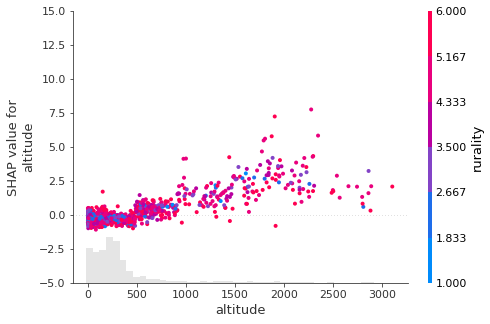

In [67]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15)

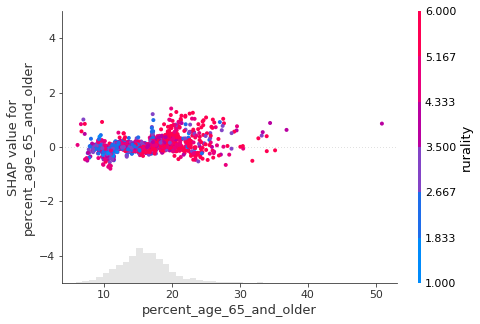

In [68]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

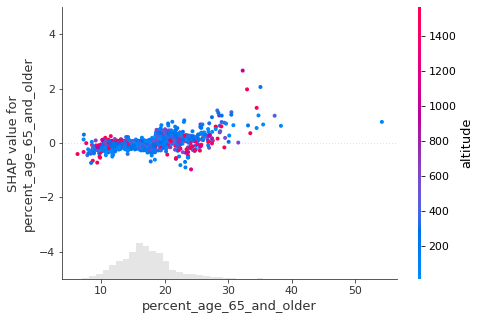

In [114]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"altitude"], ymin = -5, ymax = 5)